In [2]:
import pandas as pd

In [3]:
df = pd.read_json("filmy.json")

In [4]:
df = df.explode("Lokace")

<AxesSubplot:xlabel='Copyright'>

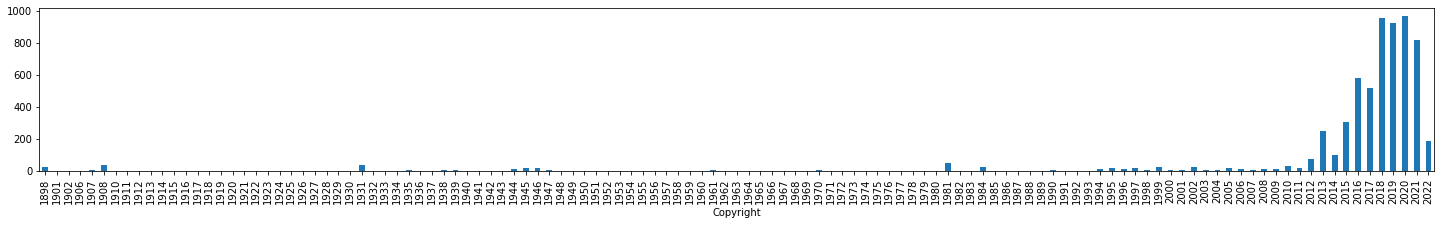

In [5]:
df.groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

<AxesSubplot:xlabel='Copyright'>

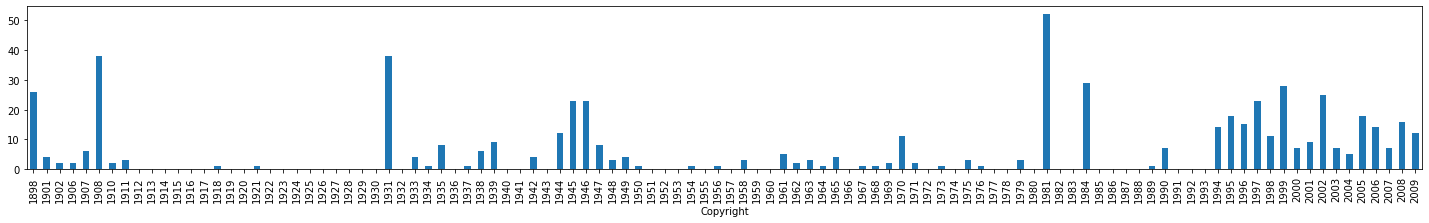

In [6]:
df[df["Copyright"] < 2010].groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

In [4]:
df.groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Česká republika, Praha (Česká republika)    101
Nové Město (Praha)                           79
Staré Město (Praha)                          64
Malá Strana (Praha)                          57
Vltava (Praha)                               57
Hradčany (Praha)                             40
Vinohrady (Praha)                            37
Praha (Česká republika)                      36
Holešovice (Praha)                           35
Žižkov (Praha)                               32
Dejvice (Praha)                              30
Smíchov (Praha)                              26
Staroměstské náměstí (Staré Město)           25
Václavské náměstí (Nové Město)               24
Bubeneč (Praha)                              23
Karlín (Praha)                               23
Slovensko, Bratislava (Slovensko)            23
Nusle (Praha)                                20
Josefov (Praha)                              19
Národní třída (Nové Město)                   19
Pražský hrad (Hradčany)          

In [9]:
df[df["Lokace"].str.lower().str.contains("ulice", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Vodičkova ulice (Nové Město)                         11
Pernerova ulice (Karlín)                              9
Praha, ulice (Praha)                                  7
Vinohradská ulice (Vinohrady)                         7
Bělohorská ulice (Břevnov)                            6
Pařížská ulice (Staré Město)                          6
ulice Komunardů (Holešovice)                          6
Dejvická ulice (Dejvice)                              5
Koulova ulice (Dejvice)                               5
Lucerna (Vodičkova ulice)                             5
Nádražní ulice (Smíchov)                              5
Sněmovní ulice (Malá Strana)                          5
Spálená ulice (Nové Město)                            5
ulice Na Pankráci (Nusle)                             5
ulice Politických vězňů (Nové Město)                  5
Bartolomějská ulice (Staré Město)                     4
Hellichova ulice (Malá Strana)                        4
Husova ulice (Staré Město)               

In [7]:
df[df["Lokace"].str.lower().str.contains("zámek", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Mostecko, zámek Jezeří                                                                                                                                                       2
zámek /skleníky/ (Veltrusy)                                                                                                                                                  2
Benešovsko, Martinice u Dolních Kralovic, zámek Martinice (Martinice u Dolních Kralovic)                                                                                     1
Bobnice, Poděbrady, zámek (Poděbrady)                                                                                                                                        1
Egyptský pavilon (zámek Veltrusy)                                                                                                                                            1
Hostýnské vrchy, Panská skála (Varahany) u Kamenického Šenova, Zlatý vrch u České Kamenice, tvrz Cuknštejn, Roudnice n

In [6]:
df[df["Lokace"].str.lower().str.contains("náměstí", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Staroměstské náměstí (Staré Město)                                            25
Václavské náměstí (Nové Město)                                                24
náměstí Jana Palacha (Josefov)                                                13
Hradčanské náměstí (Hradčany)                                                 11
Malostranské náměstí (Malá Strana)                                            11
Národní muzeum (Václavské náměstí)                                             7
Václavské náměstí (Praha)                                                      7
náměstí Republiky (Staré Město)                                                7
náměstí Curieových (Staré Město)                                               6
Pražský hrad (Hradčanské náměstí)                                              5
Rudolfinum (náměstí Jana Palacha)                                              5
Staroměstská radnice (Staroměstské náměstí)                                    5
náměstí Svobody (Bube

In [13]:
df[df["Lokace"].str.lower().str.contains("(kostel|katedrála)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_12240\356451550.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Lokace"].str.lower().str.contains("(kostel|katedrála)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)


Lokace
Katedrála sv. Víta (Pražský hrad)                                                                                                                                                                        4
kostel sv. Mikuláše (Malostranské náměstí)                                                                                                                                                               3
Katedrála sv. Víta (Praha)                                                                                                                                                                               2
kostel sv. Cyrila a Metoděje (Karlínské náměstí)                                                                                                                                                         2
kostel sv. Ludmily (náměstí Míru)                                                                                                                                                    

In [11]:
df[df["Lokace"].str.lower().str.contains("brno", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Brno (Česká republika)                                                                                                                                                                                   14
Česká republika, Brno (Česká republika)                                                                                                                                                                   9
Výstaviště (Brno)                                                                                                                                                                                         3
Kounicova ulice (Brno)                                                                                                                                                                                    2
Kraví hora (Brno)                                                                                                                                                                